## This notebook will construct the nodes and edges that we will build our graph with

Import relevant libraries and import raw data

In [1]:
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../data/current_clean_spectrum.csv")

<AxesSubplot: xlabel='WaveNumber', ylabel='Absorbance'>

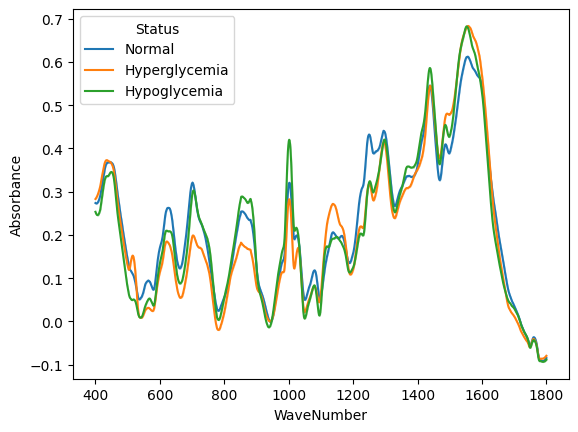

In [8]:
#sns.lineplot(data=df, x='WaveNumber', y='Absorbance', hue='Status', errorbar=('ci', False))

Here we use scipy's function "find_peaks" to find all peaks in each individual spectra sample as well as pulling featurse such as prominence and width of peaks

In [3]:
df

,SpecID,Seq,WaveNumber,SurID,Status,Absorbance
0,201210-1-00,293,400.22778,201210-1,Normal,36.536980
1,201210-1-00,294,400.91116,201210-1,Normal,36.477396
2,201210-1-00,295,401.59454,201210-1,Normal,36.415312
3,201210-1-00,296,402.27789,201210-1,Normal,36.351024
4,201210-1-00,297,402.96127,201210-1,Normal,36.284828
...,...,...,...,...,...,...
6239200,210526-3-09,2337,1797.03870,210526-3,Hyperglycemia,-14.254770
6239201,210526-3-09,2338,1797.72200,210526-3,Hyperglycemia,-13.647041
6239202,210526-3-09,2339,1798.40550,210526-3,Hyperglycemia,-13.001735
6239203,210526-3-09,2340,1799.08890,210526-3,Hyperglycemia,-12.318531


In [4]:
pivoted_df = df.pivot(index='SpecID', columns='WaveNumber', values='Absorbance').reset_index()
pivoted_df.columns.name = None
statuses = df[['SpecID', 'Status']].drop_duplicates()
pivoted_df = pd.merge(pivoted_df, statuses, on='SpecID')
pivoted_df = pivoted_df.set_index('SpecID')

In [5]:
pivoted_df

,400.22778,400.91116,401.59454,402.27789,402.96127,403.64465,404.32803,405.01138,405.69476,406.37814,...,1794.3053,1794.9886,1795.672,1796.3553,1797.0387,1797.722,1798.4055,1799.0889,1799.7722,Status
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,36.536980,36.477396,36.415312,36.351024,36.284828,36.217021,36.147899,36.077759,36.006895,35.935606,...,-5.518136,-6.293482,-7.138413,-8.055791,-9.048481,-10.119347,-11.271253,-12.507063,-13.829640,Normal
201210-1-01,50.319691,51.295502,52.237759,53.146676,54.022468,54.865349,55.675533,56.453233,57.198664,57.912040,...,-6.947433,-6.644829,-6.276792,-5.840352,-5.332536,-4.750373,-4.090891,-3.351118,-2.528082,Normal
201210-1-02,190.585968,186.912756,183.589990,180.603092,177.937483,175.578582,173.511810,171.722588,170.196336,168.918476,...,-21.546459,-21.749715,-21.911989,-22.032525,-22.110566,-22.145358,-22.136144,-22.082167,-21.982673,Normal
201210-1-03,288.308888,287.338603,286.331160,285.291986,284.226506,283.140147,282.038333,280.926492,279.810049,278.694429,...,-46.427021,-46.520243,-46.579275,-46.605348,-46.599689,-46.563526,-46.498090,-46.404608,-46.284308,Normal
201210-1-04,203.595376,198.176613,193.180206,188.591709,184.396674,180.580657,177.129210,174.027888,171.262244,168.817831,...,-31.917139,-32.408563,-32.874030,-33.313319,-33.726212,-34.112486,-34.471922,-34.804300,-35.109399,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210526-3-45,-7.534699,-6.473072,-5.545184,-4.744266,-4.063547,-3.496257,-3.035627,-2.674885,-2.407262,-2.225987,...,-10.695711,-10.361687,-10.037766,-9.725877,-9.427953,-9.145927,-8.881728,-8.637290,-8.414543,Hyperglycemia
210526-3-46,-5.113222,-5.691376,-6.241225,-6.761182,-7.249660,-7.705072,-8.125830,-8.510349,-8.857041,-9.164320,...,-14.983336,-14.667815,-14.263498,-13.766080,-13.171255,-12.474717,-11.672162,-10.759283,-9.731776,Hyperglycemia
210526-3-47,-1.596120,-1.363739,-1.207513,-1.121811,-1.101003,-1.139457,-1.231543,-1.371631,-1.554090,-1.773289,...,-11.829677,-11.222087,-10.567533,-9.866156,-9.118095,-8.323493,-7.482490,-6.595227,-5.661845,Hyperglycemia


In [6]:
status_df = pivoted_df['Status']

In [7]:
status_df = status_df.reset_index()

In [8]:
status_df

,SpecID,Status
0,201210-1-00,Normal
1,201210-1-01,Normal
2,201210-1-02,Normal
3,201210-1-03,Normal
4,201210-1-04,Normal
...,...,...
3040,210526-3-45,Hyperglycemia
3041,210526-3-46,Hyperglycemia
3042,210526-3-47,Hyperglycemia
3043,210526-3-48,Hyperglycemia


In [9]:
surface = df.groupby(['SpecID', 'SurID']).first().reset_index()

In [10]:
surface.drop(columns=['Seq', 'WaveNumber', 'Status', 'Absorbance'], inplace=True)

In [11]:
surface

,SpecID,SurID
0,201210-1-00,201210-1
1,201210-1-01,201210-1
2,201210-1-02,201210-1
3,201210-1-03,201210-1
4,201210-1-04,201210-1
...,...,...
3040,210526-3-45,210526-3
3041,210526-3-46,210526-3
3042,210526-3-47,210526-3
3043,210526-3-48,210526-3


In [12]:
status_df = pd.merge(status_df, surface, left_on='SpecID', right_on='SpecID', how='inner')

In [13]:
status_df

,SpecID,Status,SurID
0,201210-1-00,Normal,201210-1
1,201210-1-01,Normal,201210-1
2,201210-1-02,Normal,201210-1
3,201210-1-03,Normal,201210-1
4,201210-1-04,Normal,201210-1
...,...,...,...
3040,210526-3-45,Hyperglycemia,210526-3
3041,210526-3-46,Hyperglycemia,210526-3
3042,210526-3-47,Hyperglycemia,210526-3
3043,210526-3-48,Hyperglycemia,210526-3


In [14]:
status_df.to_csv('../../data/graph_2_8/status.csv')

In [15]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

# Drop the 'Status' column as it is not numeric
X = pivoted_df.drop(columns=['Status'])

# Calculate pairwise Euclidean distances
distances = pdist(X.values, metric='euclidean')

# Convert the condensed distances to a square matrix form
distance_matrix = squareform(distances)

In [16]:
import numpy as np

def gaussian_kernel(distances, sigma):
    return np.exp(-distances**2 / (2 * sigma**2))

# Sigma is the bandwidth parameter
sigma = 3000 # Adjust sigma as needed
kernel_matrix = gaussian_kernel(distance_matrix, sigma)

# Convert the kernel matrix to a DataFrame
kernel_df = pd.DataFrame(kernel_matrix, index=pivoted_df.index, columns=pivoted_df.index)

In [17]:
kernel_df

SpecID,201210-1-00,201210-1-01,201210-1-02,201210-1-03,201210-1-04,201210-1-05,201210-1-06,201210-1-07,201210-1-09,201210-1-10,...,210526-3-40,210526-3-41,210526-3-42,210526-3-43,210526-3-44,210526-3-45,210526-3-46,210526-3-47,210526-3-48,210526-3-49
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,1.000000,0.918227,0.034397,0.000011,0.336272,0.154710,0.118234,0.291132,0.283747,0.589467,...,0.752414,0.768342,0.772976,0.825607,0.838220,0.848897,0.860988,0.858623,0.879378,0.876217
201210-1-01,0.918227,1.000000,0.056483,0.000027,0.456902,0.227295,0.164943,0.350550,0.328492,0.612273,...,0.740624,0.752462,0.746925,0.779078,0.782464,0.785585,0.792635,0.779863,0.791977,0.788405
201210-1-02,0.034397,0.056483,1.000000,0.001822,0.040831,0.026606,0.017070,0.027196,0.025564,0.029665,...,0.028201,0.027417,0.026222,0.025674,0.024931,0.023781,0.024200,0.024453,0.022183,0.021629
201210-1-03,0.000011,0.000027,0.001822,1.000000,0.000145,0.000083,0.000047,0.000036,0.000025,0.000015,...,0.000038,0.000034,0.000027,0.000021,0.000019,0.000016,0.000015,0.000015,0.000011,0.000011
201210-1-04,0.336272,0.456902,0.040831,0.000145,1.000000,0.711281,0.393725,0.458875,0.368790,0.455694,...,0.441506,0.441023,0.416588,0.397345,0.380658,0.370764,0.363854,0.340569,0.330402,0.337069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210526-3-45,0.848897,0.785585,0.023781,0.000016,0.370764,0.152446,0.112781,0.264167,0.239866,0.515746,...,0.953342,0.965807,0.969271,0.992495,0.995815,1.000000,0.996569,0.991193,0.986584,0.983253
210526-3-46,0.860988,0.792635,0.024200,0.000015,0.363854,0.151914,0.114497,0.270751,0.248072,0.530634,...,0.940823,0.956381,0.959551,0.988867,0.992780,0.996569,1.000000,0.993840,0.991862,0.989624
210526-3-47,0.858623,0.779863,0.024453,0.000015,0.340569,0.139331,0.106028,0.255977,0.235478,0.511520,...,0.924428,0.940062,0.945589,0.978885,0.985805,0.991193,0.993840,1.000000,0.992722,0.988427


In [18]:
relationship_df = kernel_df.reset_index()
relationship_df = relationship_df.melt(id_vars='SpecID', var_name=':END_ID', value_name='Weight:float')
relationship_df = relationship_df.rename(columns={'SpecID': ':START_ID'})
relationship_df[':TYPE'] = 'LINK'

In [19]:
relationship_df = relationship_df[relationship_df[":START_ID"] != relationship_df[":END_ID"]]
relationship_df = relationship_df[relationship_df[":START_ID"] < relationship_df[":END_ID"]]

In [20]:
relationship_df

,:START_ID,:END_ID,Weight:float,:TYPE
3045,201210-1-00,201210-1-01,0.918227,LINK
6090,201210-1-00,201210-1-02,0.034397,LINK
6091,201210-1-01,201210-1-02,0.056483,LINK
9135,201210-1-00,201210-1-03,0.000011,LINK
9136,201210-1-01,201210-1-03,0.000027,LINK
...,...,...,...,...
9272019,210526-3-44,210526-3-49,0.976193,LINK
9272020,210526-3-45,210526-3-49,0.983253,LINK
9272021,210526-3-46,210526-3-49,0.989624,LINK
9272022,210526-3-47,210526-3-49,0.988427,LINK


In [21]:
relationship_df.to_csv('../../data/graph_2_8/relationships.csv')

In [22]:
node_df = status_df.drop(columns=['SurID'])

In [24]:
node_df.rename(columns={'SpecID':'SpecID:ID', 'Status':'Status:LABEL'}, inplace=True)

In [27]:
node_df.to_csv('../../data/graph_2_8/nodes.csv')